austen-sense.txt 문서를 사용하여 다음 지시사항을 수행하라
1. 토큰생성 : 정규표현식으로 단어 토큰을 생성한다.
2. 형태소 분석을 하여 명사만 추출한다.
3. 추출된 명사리스트를 사용하여 출현빈도를 구하라.
4. 명사출현빈도를 사용하여 wordcloud를 작성하라.
- 워드클라우드 모양은 이미지를 사용하여 지정한다.

In [94]:
import nltk

nltk.download("book", quiet=True)
from nltk.book import *

In [95]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [96]:
sense_raw = nltk.corpus.gutenberg.raw("austen-sense.txt")
print(sense_raw[:1302])

[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park,
in the centre of their property, where, for many generations,
they had lived in so respectable a manner as to engage
the general good opinion of their surrounding acquaintance.
The late owner of this estate was a single man, who lived
to a very advanced age, and who for many years of his life,
had a constant companion and housekeeper in his sister.
But her death, which happened ten years before his own,
produced a great alteration in his home; for to supply
her loss, he invited and received into his house the family
of his nephew Mr. Henry Dashwood, the legal inheritor
of the Norland estate, and the person to whom he intended
to bequeath it.  In the society of his nephew and niece,
and their children, the old Gentleman's days were
comfortably spent.  His attachment to them all increased.
The constant attention 

In [97]:
# 토큰 생성

from nltk.tokenize import sent_tokenize
print(sent_tokenize(sense_raw[:1000])[3])

But her death, which happened ten years before his own,
produced a great alteration in his home; for to supply
her loss, he invited and received into his house the family
of his nephew Mr. Henry Dashwood, the legal inheritor
of the Norland estate, and the person to whom he intended
to bequeath it.


In [98]:
from nltk.tokenize import word_tokenize
word_tokenize(sense_raw[50:100])

['ER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settle']

In [99]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(sense_raw[50:100])

['ER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settle']

In [100]:
# 형태소 분석

from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [101]:
# 원형복원
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [102]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [103]:
from nltk.tag import pos_tag
sentence = "The family of Dashwood had long been settled in Sussex."
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('The', 'DT'),
 ('family', 'NN'),
 ('of', 'IN'),
 ('Dashwood', 'NNP'),
 ('had', 'VBD'),
 ('long', 'RB'),
 ('been', 'VBN'),
 ('settled', 'VBN'),
 ('in', 'IN'),
 ('Sussex', 'NNP'),
 ('.', '.')]

In [104]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['family']

In [105]:
from nltk.tag import untag
untag(tagged_list)

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [106]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['The/DT',
 'family/NN',
 'of/IN',
 'Dashwood/NNP',
 'had/VBD',
 'long/RB',
 'been/VBN',
 'settled/VBN',
 'in/IN',
 'Sussex/NNP',
 './.']

In [107]:
# Text 클래스

from nltk import Text

text = Text(retokenize.tokenize(sense_raw))

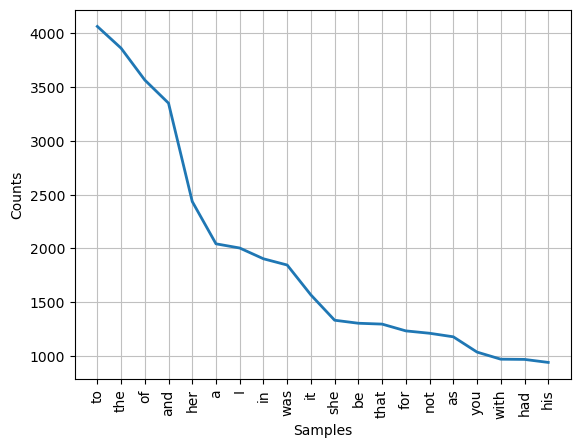

In [108]:
import matplotlib.pyplot as plt
text.plot(20)
plt.show()

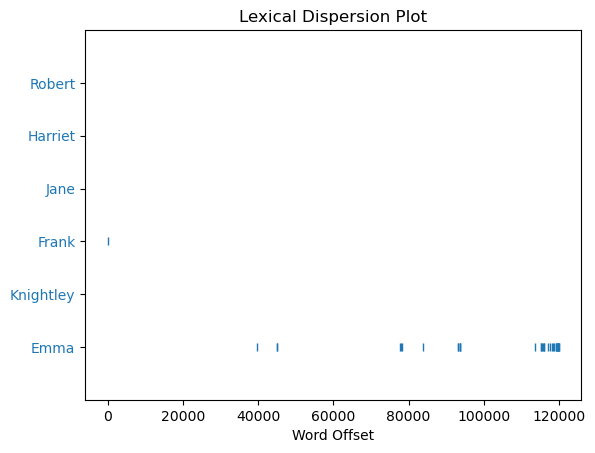

In [109]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [110]:
text.concordance("Sense")

Displaying 25 of 32 matches:
 Sense and Sensibility by Jane Austen 1811 
pleasing but in HER mind there was a sense of honor so keen a generosity so rom
s romance without having much of her sense she did not at thirteen bid fair to 
 is not in every thing equal to your sense of his merits I have not had so many
ion in the world of his goodness and sense I think him every thing that is wort
 her sister so easily pleased Of his sense and his goodness continued Elinor no
 know no moderation and leave him no sense of fatigue Aye aye I see how it will
he visit tended to assure him of the sense elegance mutual affection and domest
s you call him is a sensible man and sense will always have attractions for me 
a mere calmness of manner with which sense had nothing to do Towards her husban
ns on the reasonable basis of common sense and observation and then they may be
y one of a child much less because a sense of duty would prevent the denial whi
he matter farther but in vain common sense comm

In [111]:
text.similar("Sense")

sister that side as opinion mother means time marianne wish want part
sweetness resolution and family property manner life but


In [112]:
# FreqDist

fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [113]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(sense_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [114]:
fd_names.N(), fd_names["Sense"], fd_names.freq("Sense")

(5618, 0, 0.0)

In [115]:
fd_names.most_common(10)

[('Elinor', 665),
 ('Marianne', 561),
 ('Edward', 262),
 ('Dashwood', 252),
 ('Jennings', 221),
 ('Willoughby', 209),
 ('Lucy', 184),
 ('Colonel', 173),
 ('John', 163),
 ('Brandon', 144)]

In [116]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

im=Image.open('data/img.png')
mask_arr=np.array(im)
mask_arr

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

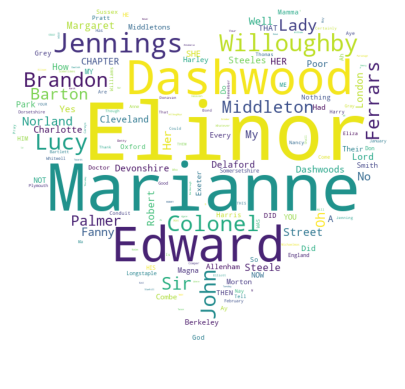

In [117]:
wc=WordCloud(width=1000, height=1000, background_color='white',
             mask=mask_arr,random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.savefig('data/test2.png')
plt.show()